# Nearest neighbors

Is algorithm that allows to build find closest points

In [1]:
import io
import PIL
from PIL import Image
from IPython.display import Image as IPImage

from sklearn.neighbors import NearestNeighbors
from sklearn.datasets import make_blobs

import matplotlib.pyplot as plt

Let's consider an example - a set of two-dimensional objects that we are going to use among which we need to choose some set of the closest to the given object.

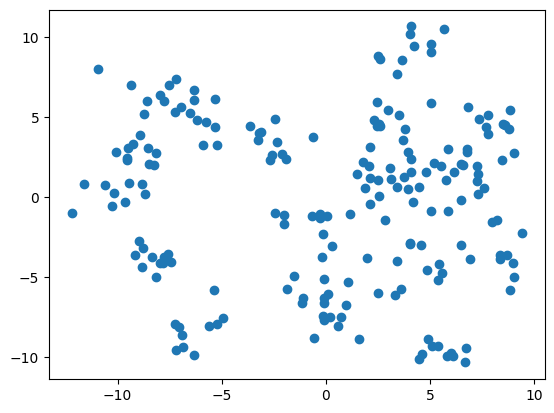

In [38]:
X, _ = make_blobs(
    n_samples=200,
    random_state=10,
    centers=20
)
plt.scatter(X[:,0], X[:,1])
plt.show()

To use `sklearn.neighbours.NearestNeighbours` we need to define the number of neighbours and apply it to the data under consideration.

In [3]:
nn = NearestNeighbors(n_neighbors=20).fit(X)

Here is an animation showing the result of the algorithm for different positions of the considered point (green point). The closest neighbours at any time are shown as red dots.

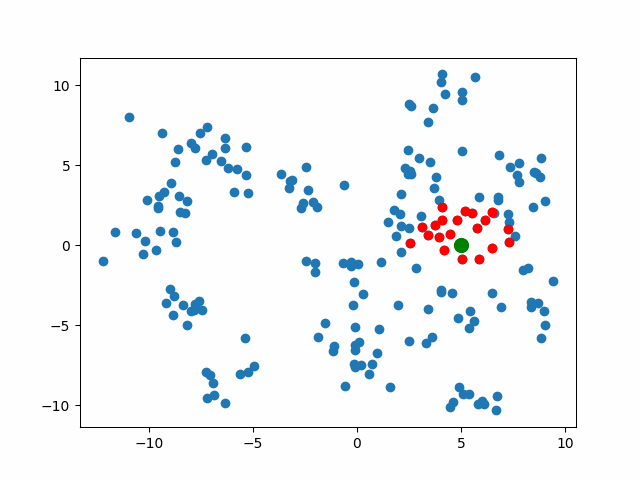

In [35]:
def get_picture(coordinates : list[float]) -> PIL.PngImagePlugin.PngImageFile:
    '''
    Get picture that show neighbours
    for given coordinates.

    Parameters
    ----------
    coordinates : list[float]
        сoordinates for which you need 
        to find neighbours.

    Returns
    -------
    out : PIL.PngImagePlugin.PngImageFile
        picture with scatters.
    '''
    
    # getting neighrours
    distances, indices = nn.kneighbors([coordinates])

    # plotting scatter
    fig, ax = plt.subplots()
    ax.scatter(
        coordinates[0],
        coordinates[1],
        color="Green",
        s=100
    )
    ax.scatter(X[:,0], X[:,1])
    ax.scatter(X[indices, 0], X[indices, 1], color="red")

    # saving to buffer
    buf = io.BytesIO()
    plt.savefig(buf, format='png')
    buf.seek(0)
    plt.close(fig)

    return Image.open(buf)

# generate frames on which the 
# coordinate to which neighbours 
# are searched moves in a circle.
frames = [
    get_picture([np.cos(angle)*5, np.sin(angle)*5])
    for angle in np.linspace(0, 2*np.pi, 100)
]

# creating buffer with gif file
# and displaying it
gif_buf = io.BytesIO()
frames[0].save(
    gif_buf, 
    format='GIF', 
    save_all=True, 
    append_images=frames[1:], 
    duration=100, 
    loop=0
)
gif_buf.seek(0)
IPImage(data=gif_buf.getvalue())